## Notebook to display boreholes on a map and to create the gpkg database from an existing sql3database and shapefile data

Create gpkg from shp 

In [5]:
import geopandas as gpd
import pandas as pd
import folium
import sqlite3

read shp file (as a geodataframe)

In [23]:
dat_shp = gpd.read_file("/home/gfa/GSDMA2019/playground/pilote/pilote/Pilote_v7.0.shp")


Read GPKG as a GeoDataFrame

In [8]:
data_from_gpkg = gpd.read_file("/home/gfa/GSDMA2019/playground/pilote/data.gpkg")

Write a geojson from gdf

In [9]:
data_from_gpkg.to_file("data.geojson", driver='GeoJSON')

## Work on data

### Add a Colomn

In [10]:
data_from_gpkg['new_column'] = None

In [11]:
data_from_gpkg.loc[0, 'new_column'] = 'Senaatintori'

## Plot

### Naive

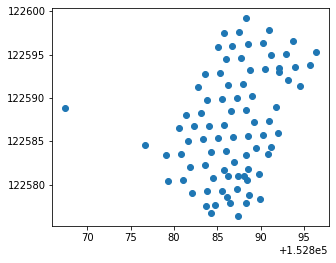

In [12]:
data_from_gpkg.plot()

## CRS

EPSG 31370 (Lambert 72)

In [24]:
dat_84 = dat_shp.to_crs(epsg=4326)

/home/gfa/.local/share/virtualenvs/GSDMA2019-F9ES6BKJ/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


### Create GPKG from gdf

In [25]:
dat_84.to_file("dat.gpkg", driver="GPKG")

### List of Tables

In [26]:
list_tables = ['Components', 'Intervals', 'Boreholes','Lexicon']

### Copy Tables

In [27]:
db_copy_sqlite3_tables('project_database.db','dat.gpkg',list_tables)

0

## Folium 

In [28]:
dat_gdf = gpd.read_file("dat.gpkg")


In [29]:
dat_84.to_file("output.json", driver="GeoJSON")

In [31]:
ice_map = folium.Map(location=[50.455, 3.94],
                    zoom_start=10)
folium.GeoJson(
    'output.json').add_to(ice_map)
ice_map

save in a file

In [20]:
ice_map.save('index.html')

## Access SQlite

In [21]:
conn = sqlite3.connect('/home/gfa/test/GSDMA2019-develop/project_database.db')

In [22]:
conn

In [23]:
cursor = conn.cursor()

Check which tables are in db

In [24]:
for table in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(table)

('Boreholes',)
('Intervals',)
('Components',)
('Lexicon',)


Access the data 

### Copy tables of a SQL3 database to another database

In [15]:
def db_copy_sqlite3_tables(db_in, db_out, tables):
    """
    Copy tables from one database to another
    :param db_in: full filename of the origin of tables 
    :type db_in: string
    :param db_out: full filename of the destination of tables
    :type db_out: string
    :param tables: list of tables to copy
    :type tables: list
    :return: status, 0: OK, 1: failure
    :rtype: int
    """
    import sqlite3
    import pandas as pd
    
    status = 0
    try:
        conn_in = sqlite3.connect(db_in)
        conn_out = sqlite3.connect(db_out)
        for i in tables:
            df = pd.read_sql_query("SELECT * from {table:s}".format(table=i), conn_in)
            df.to_sql("{table:s}".format(table=i),conn_out, if_exists='replace', index = False)
        conn_in.close()
        conn_out.close()
    except Exception as e:
        print('Error copying tables:\n {error:s}'.format(error=e))
        status = 1
    return status    

In [17]:
list_tables = ['Components', 'Intervals', 'Boreholes','Lexicon']

In [18]:
type(data_from_gpkg)

geopandas.geodataframe.GeoDataFrame

In [19]:
#db_copy_sqlite3_tables('final.db','data.gpkg',list_tables)

In [20]:
db_copy_sqlite3_tables('project_database.db','dat.gpkg',list_tables)

0

In [21]:
dat_gdf = gpd.read_file("dat.gpkg")

Add column with the name of the borehole

In [22]:
dat_gdf['id'] = 'F'+data_from_gpkg['Ref']